## CSC 271 - Intro to Data Science 
## Tue, Feb 4
## Lesson 04
## Image manipulation, part 2

In [2]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt
import matplotlib

Today we're going to continue thinking about image manipulation,
and in particular, we're going to write functions for several image processing tasks ...

In [ ]:
# We'll start with an image ...
my_image = data.cat() 
plt.imshow(my_image) #shows the cat picture
plt.show()

In [ ]:
# To work at the pixel level let's try a loop structure 
# that allows us to manipulate each color channel separately. 

image = data.cat() 

w = len(image[0])    # <-- the size of the first row 
h = len(image[:,0])  # <-- the size of the first column

for i in range(h):
    for j in range(w):
        r = image[i,j,0] #color channels
        g = image[i,j,1]
        b = image[i,j,2]
        red = r + 0.5*(255-r) #these are colors that are closer to white
        green = g + 0.5*(255-g) #halfway to the finish lines
        blue = b + 0.5*(255-b)
        image[i,j] = np.uint8([red,green,blue]) #changes the rgb color channels by pushing each color channel closer to the white
        
plt.imshow(image)
plt.show()

# What effect does this code produce? 
#this code produces a lightened up picture

In [ ]:
# with this im mind, we can encapsulate some action in a function

def negative_filter(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    for i in range(h):
        for j in range(w):
            r = pic[i,j,0]
            g = pic[i,j,1]
            b = pic[i,j,2]
            red = 255-r # color is now closer to black
            green = 255-g
            blue = 255-b
            pic[i,j] = [red,green,blue]
            
# Note: this modifies the image passed into it ... and there is no return

cat = data.cat() 
negative_filter(cat)
plt.imshow(cat)
plt.show()

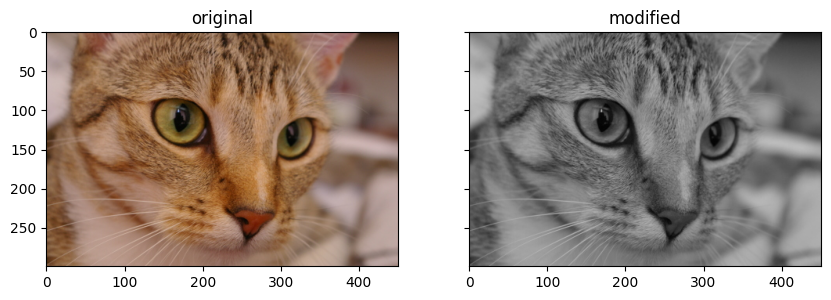

In [9]:
# another option is to create a new image to return and leave the original unchanged

def gray_filter(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic)
    for i in range(h):
        for j in range(w):
            r = pic[i,j,0]
            g = pic[i,j,1]
            b = pic[i,j,2]
            gray = r/3+g/3+b/3 #changes the color to gray by averaging by 3 can't add all together bc it wraps
            new_pic[i,j] = np.uint8([gray,gray,gray])
            
    return new_pic
    
old_cat = data.cat() 
new_cat = gray_filter(old_cat)


fig, (p1, p2) = plt.subplots(1, 2,sharey=True,figsize=(10, 20)) #subplots of the modified and original picture objects.

p1.imshow(old_cat)
p2.imshow(new_cat)
p1.set_title('original')
p2.set_title('modified')

plt.show()

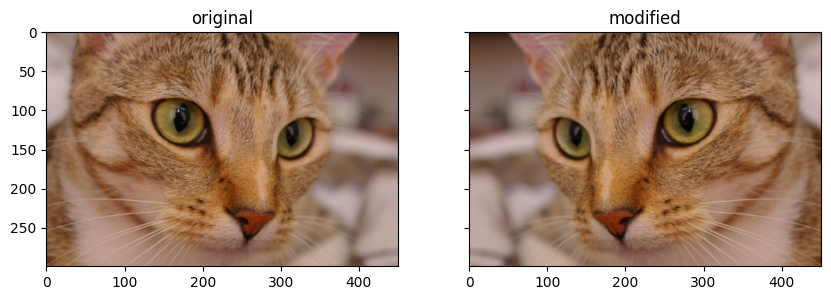

In [10]:
# try this one ...

def mirror(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic)
    for i in range(h):
        for j in range(w):
            new_pic[i,w-1-j] = pic[i,j]  # <-- work through the logic here i and j, is the row and the column, goes backwards
            
    return new_pic

old_cat = data.cat() 
new_cat = mirror(old_cat)

fig, (p1, p2) = plt.subplots(1, 2,sharey=True,figsize=(10, 20))
p1.imshow(old_cat)
p2.imshow(new_cat)
p1.set_title('original')
p2.set_title('modified')
plt.show()

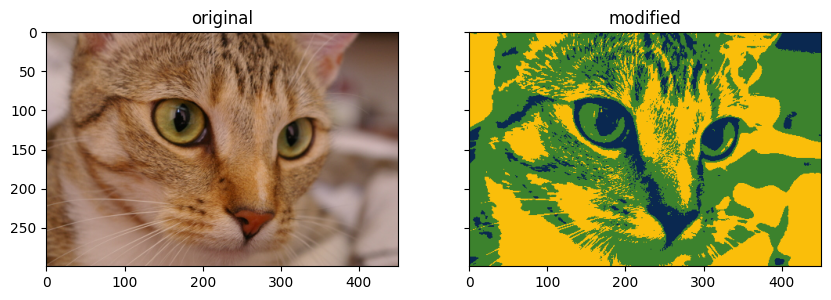

In [11]:
def posterize(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic) # create a new image to return
    for i in range(h):
        for j in range(w):
            r = pic[i,j,0]
            g = pic[i,j,1]
            b = pic[i,j,2]
            gray = r/3+g/3+b/3
            if gray>125:
                val = np.uint8([250,190,10]) #np.uint8([240,170,30])
            elif gray>75:
                val = np.uint8([60,130,45])
            else:
                val = np.uint8([10,40,80])
            new_pic[i,j] = val
            
    return new_pic
    
old_cat = data.cat() 
new_cat = posterize(old_cat)

fig, (p1, p2) = plt.subplots(1,2,sharey=True,figsize=(10, 5))
p1.imshow(old_cat)
p2.imshow(new_cat)
p1.set_title('original')
p2.set_title('modified')
plt.show()

In [ ]:
# With our functions defined, we can now use them together
# note the difference in usage based on our definitions

pic = data.cat()

new_pic = mirror(posterize(pic))  # <-- these functions return an image

negative_filter(new_pic)  # <-- this function modifies the image directly

plt.imshow(new_pic)
plt.show()

### Class Exercises:

(1) Create a filtering function called **darken()** that darkens the image passed to it.  Do this by decreasing the color value of each channel by 20%.  

(2) Create a filtering function called **lighten()** that lightens the image passed to it.  Do this by increasing the color value of each channel by 20% of the "distance" to 255.

(3) Create a function called **flip()** that returns a new image that is an upside down version of the image passed to it.  

(4) Create a function called **rotate()** that returns a new image that is a 90 degrees counterclockwise version of the image passed to it. (This is tricky!)

(5) Create a function called **square_crop()** that returns a new image that is a cropped version of the original. It should "cut off" either the extra rows or columns so that is always square in shape (height = width).

### Homework:

We're doing a good job working through some fundamentals of working with data, but we really haven't been doing data science ... depending on what we mean by data science.  If we are hoping to come away from this class with some proficiency in data science, then we should at least try to get a good idea about what data science is all about.  Before class Thursday, please read the following (short) articles and come prepared to discuss.  

https://hackernoon.com/what-on-earth-is-data-science-eb1237d8cb37

https://hackernoon.com/top-10-roles-for-your-data-science-team-e7f05d90d961


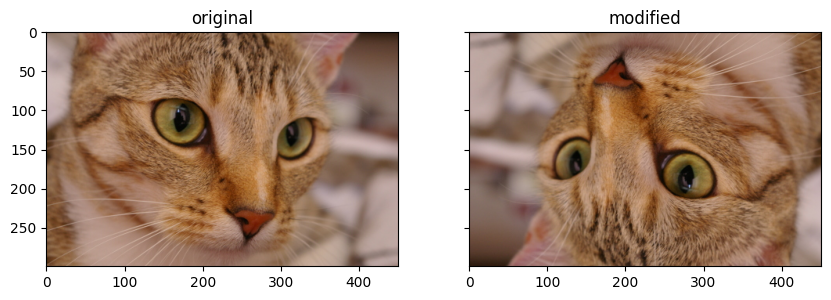

In [61]:
def darken(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    for i in range(h):
        for j in range(w):
            r = pic[i,j,0]
            g = pic[i,j,1]
            b = pic[i,j,2]
            red = np.round(0.8 * r)# color is now closer to black
            #print(red, r)
            green = np.round(0.8*g)
            blue = np.round(0.8*b)
            pic[i,j] = np.uint8([red,green,blue])

            

def lighten(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    for i in range(h):
        for j in range(w):
            r = pic[i,j,0]
            g = pic[i,j,1]
            b = pic[i,j,2]
            red = r + 0.8*(r) #these are colors that are closer to white
            green = g + 0.8*(g) #halfway to the finish lines
            blue = b + 0.8*(b)
            image[i,j] = np.uint8([red,green,blue])

def flip(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic)
    for i in range(h):
        for j in range(w):
            new_pic[h-1-i,w-1-j] = pic[i,j]  # <-- work through the logic here i and j, is the row and the column, goes backwards
            
    return new_pic

def rotate(pic):
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic)
    for i in range(h):
        for j in range(w):
            new_pic[h-1+j,w-1+i] = pic[i,j]  # <-- work through the logic here i and j, is the row and the column, goes backwards
            
    return new_pic

def square_crop(pic):
    pass

cat=data.cat()
new_cat=flip(cat)



fig, (p1, p2) = plt.subplots(1, 2,sharey=True,figsize=(10, 20))
p1.imshow(old_cat)
p2.imshow(new_cat)
p1.set_title('original')
p2.set_title('modified')
plt.show()


plt.show()
